# Data Science

## Importing Data
My data: Spotify's Top Songs in 2022

The data contains 646 songs, with 17 columns for different aspects of each song.

In [73]:
import pandas as pd

from google.colab import drive
drive.mount("/content/drive/")
df = pd.read_csv("/content/drive/MyDrive/spotify_top_charts_22.csv")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Graphs

Here I'm creating a histogram to show a trend in the number of weeks a popular song remains on Spotify's top songs chart.

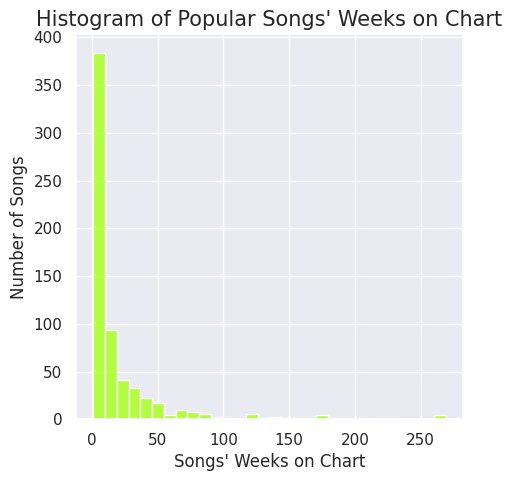

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(5, 5))
plt.title("Histogram of Popular Songs' Weeks on Chart", size = 15)
plt.xlabel("Songs' Weeks on Chart")
plt.ylabel('Number of Songs')
plt.hist(df['weeks_on_chart'], color = 'greenyellow', alpha = 0.9, bins = 30)
plt.show()

Here I'm creating a histogram to show a trend in the peak rank of a song on Spotify's top songs chart.

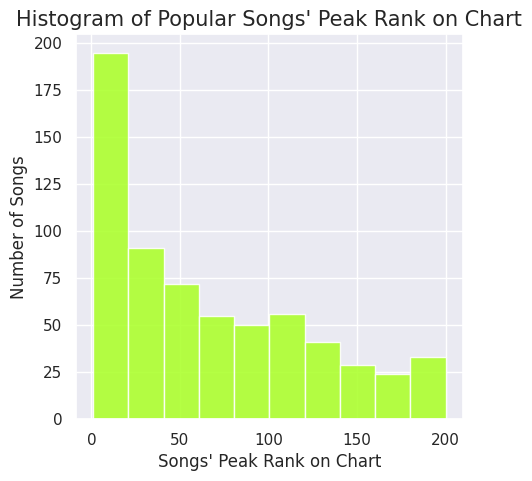

In [75]:
sns.set()
plt.figure(figsize=(5, 5))
plt.title("Histogram of Popular Songs' Peak Rank on Chart", size = 15)
plt.xlabel("Songs' Peak Rank on Chart")
plt.ylabel('Number of Songs')
plt.hist(df['peak_rank'], color = 'greenyellow', alpha = 0.9, bins = 10)
plt.show()

Here I'm creating a scatterplot to show the correlation between the danceability, energy, and peak rank of a song to see if there's a strong relationship between these factors. I predicted that a more danceable and energetic song would make a song more popular, however, as seen in the scatterplot, there isn't a very present trend.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
df2 = df.sample(n = 500)
plt.figure(figsize = [5, 5])
plt.title('Correlation Between Danceability, Energy, and Peak Rank of Songs Scatterplot', size = 15)
sns.scatterplot(x = df2['danceability'], y = df2['energy'],
                #size = df2['weeks_on_chart'],
                #sizes = (10,100),
                hue = df2['peak_rank'],
                #alpha = 0.9,
                palette = 'Reds'
                )
plt.show()

In [77]:
#corr = df.select_dtypes('number').corr()
#sns.heatmap(corr, cmap='crest', annot=True)
#plt.figure(figsize=(10, 10))
#plt.show()

In [78]:
#df_group = df.groupby(['tempo']).mean()
#df_group = df_group.sort_values(by='peak_rank', ascending=False)
#df_group = df_group.iloc[:10, :]

In [79]:
#x_vals = df_group.index.to_series()
#y_vals = df_group['peak_rank']
#plt.figure(figsize=(10, 14))
#sns.barplot(x=y_vals, y=x_vals, palette='Greens_r')
#plt.show()

In [80]:
df.isnull().sum().sum()

0

In [81]:
df = (df.loc[:, df.columns != 'artist_names'])
df = (df.loc[:, df.columns != 'uri'])
df = (df.loc[:, df.columns != 'track_name'])

df.head()

,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,1,65,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,80.870,4,238805
1,1,37,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,169.928,4,141806
2,3,3,0.812,0.736,4,-5.421,0,0.0833,0.1520,0.002540,0.0914,91.993,4,193806
3,3,21,0.728,0.783,11,-4.424,0,0.2660,0.2370,0.000000,0.4340,77.011,4,173381
4,1,19,0.695,0.540,4,-5.692,1,0.0493,0.2990,0.000000,0.3670,121.932,4,168602


In [82]:
df['top_ranked'] = 0

for i in range(len(df)):
  if df['peak_rank'].iloc[i] < 5:
    df['top_ranked'].iat[i] = 1

df['top_ranked']

print(df.columns)

Index(['peak_rank', 'weeks_on_chart', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'tempo', 'time_signature', 'duration_ms', 'top_ranked'],
      dtype='object')


# Machine Learning

## Basic

Here I'm preparing my data to undergo prediction and scoring models

In [83]:
# preparation

import pandas as pd
from google.colab import drive
drive.mount("/content/drive/")
df = pd.read_csv("/content/drive/MyDrive/spotify_top_charts_22.csv")

#dropping columns i find unecessary to make predictions
df.drop(['uri'], axis = 1, inplace = True)
df.drop(['track_name'], axis = 1, inplace = True)
df.drop(['artist_names'], axis = 1, inplace = True)
df.drop(['duration_ms'], axis = 1, inplace = True)
df.drop(['time_signature'], axis = 1, inplace = True)
df.drop(['key'], axis = 1, inplace = True)
df.drop(['mode'], axis = 1, inplace = True)
df.drop(['liveness'], axis = 1, inplace = True)

df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,peak_rank,weeks_on_chart,danceability,energy,loudness,speechiness,acousticness,instrumentalness,tempo
0,1,65,0.761,0.525,-6.900,0.0944,0.4400,0.000007,80.870
1,1,37,0.591,0.764,-5.484,0.0483,0.0383,0.000000,169.928
2,3,3,0.812,0.736,-5.421,0.0833,0.1520,0.002540,91.993
3,3,21,0.728,0.783,-4.424,0.2660,0.2370,0.000000,77.011
4,1,19,0.695,0.540,-5.692,0.0493,0.2990,0.000000,121.932


In [84]:
# initializing

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# creating my x and y subframes
# my "y" or value i'm predicting is the peak rank
# the "x" or values that the "y" prediction is dependent on is all values except the peak rank
y = df['peak_rank'].copy()
X = df.copy()
X.drop(['peak_rank'], axis = 1, inplace = True)

model = LinearRegression()

X_test = df.iloc[:, :-1]
y_test = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.10613481540788483

In [85]:
# view of my x values
X.head()

,weeks_on_chart,danceability,energy,loudness,speechiness,acousticness,instrumentalness,tempo
0,65,0.761,0.525,-6.900,0.0944,0.4400,0.000007,80.870
1,37,0.591,0.764,-5.484,0.0483,0.0383,0.000000,169.928
2,3,0.812,0.736,-5.421,0.0833,0.1520,0.002540,91.993
3,21,0.728,0.783,-4.424,0.2660,0.2370,0.000000,77.011
4,19,0.695,0.540,-5.692,0.0493,0.2990,0.000000,121.932


In [86]:
# view of my y values
y.head()

0    1
1    1
2    3
3    3
4    1
Name: peak_rank, dtype: int64

In [87]:
y.describe()

count    646.000000
mean      65.922601
std       57.004503
min        1.000000
25%       15.000000
50%       51.500000
75%      108.750000
max      200.000000
Name: peak_rank, dtype: float64

In [88]:
y.value_counts()

1      26
3      18
2      14
11     11
7      11
       ..
155     1
82      1
196     1
183     1
160     1
Name: peak_rank, Length: 183, dtype: int64

In [89]:
#print(y.mean())
#print(y.std())

## Regression Scoring




In [90]:
# function for calculating a model's score

def ml_score(model):
  model.fit(X, y)
  return model.score(X_test, y_test)

In [91]:
ml_score(LinearRegression())

0.1260280266807784

Here I'm testing different models to find the best scoring metric and use it for my data

In [92]:
# test model #1
# 2nd best score

from sklearn.tree import DecisionTreeRegressor
ml_score(DecisionTreeRegressor(max_depth = 8))

0.750124677606111

In [93]:
# test model #2

from sklearn.neighbors import KNeighborsRegressor
ml_score(KNeighborsRegressor(n_neighbors = 12))

0.38806096046230776

In [94]:
# test model #3
#best score

from xgboost import XGBRegressor
ml_score(XGBRegressor(max_depth = 3))

0.8968268779754037

In [95]:
# test model #4

from sklearn.ensemble import RandomForestRegressor
ml_score(RandomForestRegressor(max_depth = 2))

0.39090519475222363

## Mean Squared Error

Here I'm calculating the mean squared error and root mean squared error with my top scoring models

### DecisionTree

In [129]:
# calculating the mse and rmse with decisiontree

from sklearn.metrics import mean_squared_error
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

print(mse)
print(rmse)

4431.2962962962965
66.56798251634412


In [130]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y)
print(scores)
print(scores.mean())

[-1.63036685 -0.62917093 -0.4402667  -0.67622074 -0.52165584]
-0.7795362140281507


### XGBoost

In [133]:
# calculating the mse and rmse with xgboost

from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

print(mse)
print(rmse)

2299.575827502184
47.95389272522288


In [132]:
# calculating the rmse scores and mean

rmse_scores = (-scores)**0.5
rmse_mean = rmse_scores.mean()

print(rmse_scores)
print(rmse_mean)

[1.2768582  0.79320296 0.66352596 0.82232642 0.72225746]
0.8556341997143372


## Grid Search

Here I'm using Grid Search to find the best max depth for my DecisionTree model, and Randomized Search for my XGBoost model

In [100]:
# grid search

from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()

params = {'max_depth': [2, 3, 4, 5, 6, 8, 10, 12]}

grid_reg = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=5)
grid_reg.fit(X_train, y_train)

best_params = grid_reg.best_params_

scores = grid_reg.best_score_
rmse = (-scores)**0.5
best_score = rmse

print(best_params)
print(best_score)

{'max_depth': 2}
47.81929767065404


In [101]:
from sklearn.model_selection import RandomizedSearchCV

model = XGBRegressor()

params = {'max_depth': [2, 3, 4, 5, 6, 8, 10], # how deep is each tree (smaller generally better for gradient boosting)
          'subsample': [0.4, 0.6, 0.8, 1], # percentage of rows each boosting round
          'colsample_bylevel': [0.4, 0.6, 0.8, 1], # percentage of cols per level
          'colsample_bytree': [0.4, 0.6, 0.8, 1], # percentage of cols per tree
          'colsample_bynode': [0.4, 0.6, 0.8, 1], # percentage of cols per node
          'learning_rate': [0.02, 0.05, 0.1, 0.3, 0.5, 0.75], # size of model steps to find min error
          'n_estimators': [50, 100, 200, 400], # number of total trees (I usually wait for this as generally more is better)
          'gamma': [0, 0.1, 0.5, 1, 2, 5], # threshold nodes must surpass before making further splits
          'min_child_weight': [1, 2, 3, 4, 5] # minimum sum of weights required for a node to split
          }

grid_reg = RandomizedSearchCV(model, params, scoring='neg_mean_squared_error', cv=5)
grid_reg.fit(X_train, y_train)

best_params = grid_reg.best_params_

scores = grid_reg.best_score_
rmse = (-scores)**0.5
best_score = rmse

print(best_params)
print(best_score)

{'subsample': 0.8, 'n_estimators': 50, 'min_child_weight': 2, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 2, 'colsample_bytree': 0.4, 'colsample_bynode': 1, 'colsample_bylevel': 0.4}
50.59517062512774


### Prediction Plot

Here I'm comparing my predicted values to the actual values

In [136]:
from xgboost import XGBRegressor
model_rgs = XGBRegressor()
model_rgs.fit(X_train, y_train)
y_pred = model_rgs.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

print("The MSE is: " + str(mse))
print("The RMSE is: " + str(rmse))

The MSE is: 2299.575827502184
The RMSE is: 47.95389272522288


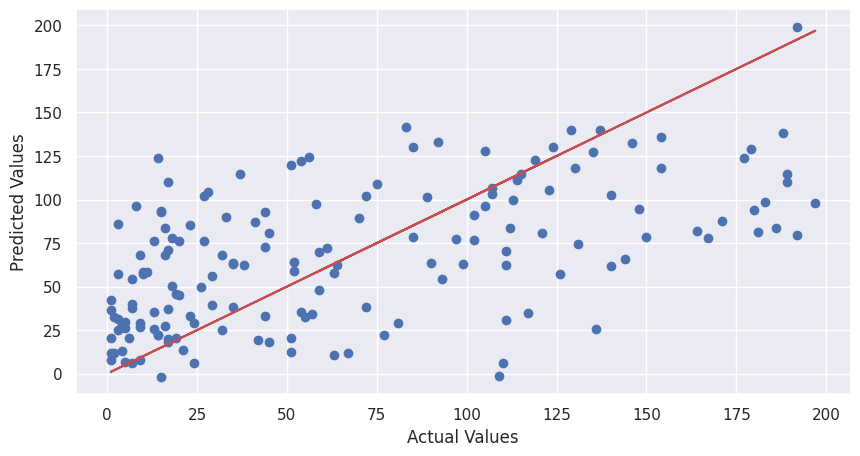

In [103]:
#plotting

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, label='Predicted vs. Actual Values')
plt.plot(y_test, y_test, label='Score', c='r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Deep Learning

In [ ]:
# preparation, as always

import pandas as pd

from google.colab import drive
drive.mount("/content/drive/")
df = pd.read_csv("/content/drive/MyDrive/spotify_top_charts_22.csv")

df.drop(['uri'], axis = 1, inplace = True)
df.drop(['track_name'], axis = 1, inplace = True)
df.drop(['artist_names'], axis = 1, inplace = True)
df.drop(['duration_ms'], axis = 1, inplace = True)
df.drop(['time_signature'], axis = 1, inplace = True)
df.drop(['key'], axis = 1, inplace = True)
df.drop(['mode'], axis = 1, inplace = True)
df.drop(['liveness'], axis = 1, inplace = True)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.head()

In [ ]:
X_train.shape
#X_train.shape[1]

In [ ]:
# using the sequential model

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

num_cols = X.shape[1]
model = Sequential()
model.add(Dense(100, input_shape=(num_cols,), activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1))
print(model.summary())
model.compile(optimizer='adam', loss='mse')
early_stopping_monitor = EarlyStopping(patience=10)
model.fit(X_train, y_train, epochs=10000, validation_split=0.2,
callbacks=[early_stopping_monitor])
mse = model.evaluate(X_test, y_test)
print("The RMSE is: " + str(mse**0.5))

In [108]:
num_cols = X_train.shape[1]

In [127]:
optimizer = keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2 = 0.999)

loss = keras.losses.MeanSquaredError()

early_stopping_condition = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

plateau_monitor = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, restore_best_weights=True)

In [ ]:
model.compile(optimizer=optimizer, loss=loss)
history = model.fit(X_train, y_train,
                        validation_split=0.2, batch_size=300, epochs=100,
                        callbacks=[early_stopping_condition, plateau_monitor])

In [ ]:
prediction = model.predict(X_test)

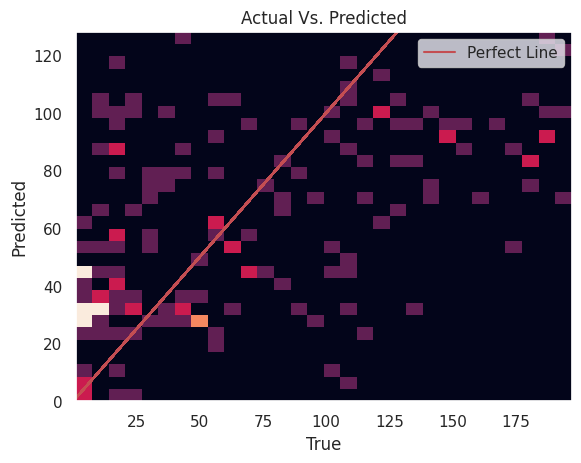

In [126]:
plt.figure()
plt.hist2d(y_test.to_numpy().ravel(), prediction.ravel(), bins=30)
plt.plot(y_test.to_numpy().ravel(), y_test.to_numpy().ravel(), label='Perfect Line', c='r')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Actual Vs. Predicted')
plt.legend()
plt.show()